We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks? 
4.) What was the correlation between different stocks' closing prices? 
4.) What was the correlation between different stocks' daily returns? 
5.) How much value do we put at risk by investing in a particular stock? 
6.) How can we attempt to predict future stock behavior?


In [2]:
#In this section we'll go over how to handle requesting stock information with 
#pandas, and how to analyze basic attributes of a stock.

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #this will give white grid background for all plots
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdweb
from pandas_datareader import data

# For time stamps
from datetime import datetime


In [3]:
# The tech stocks we'll use for this analysis
techl=['AAPL','GOOG','MSFT','AMZN']

#Setting the end date of today
end=datetime.now()

#Set the start date of end date's year-1 ie. previous year from end date
start=datetime(end.year-1,end.month,end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for i in techl:
    globals()[i]=pdweb.get_data_yahoo(i,start,end) #global() takes every string
#value in techl like AAPL and converts it into global data frame name variable AAPL
#so now if we type AAPL and run it shows the dataframe of appple stock info
    

In [4]:
AAPL.describe()
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-06-15 to 2022-06-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       255 non-null    float64
 1   Low        255 non-null    float64
 2   Open       255 non-null    float64
 3   Close      255 non-null    float64
 4   Volume     255 non-null    float64
 5   Adj Close  255 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

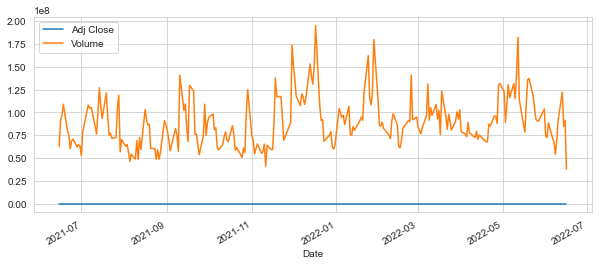

In [5]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

#plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [10]:
#Calculate the moving average of the stock averaging all the prices over a certain period
ma_day=[10,20,50]
AAPL
for i in ma_day:
    column_name='MA for %s days' %(str(i))
    AAPL[column_name]=AAPL['Adj Close'].rolling(window=i).mean()
    
AAPL


,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,129.738754,NaN,NaN,NaN
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.903549,NaN,NaN,NaN
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,129.410645,NaN,NaN,NaN
2021-06-17,132.550003,129.649994,129.800003,131.789993,96721700.0,131.041321,NaN,NaN,NaN
2021-06-18,131.509995,130.240005,130.710007,130.460007,108953300.0,129.718887,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-06-07,149.000000,144.100006,144.350006,148.710007,67808200.0,148.710007,146.329002,145.381001,157.873573
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007,147.089003,145.053502,157.325926
2022-06-09,147.949997,142.529999,147.080002,142.639999,69473000.0,142.639999,147.301003,144.860502,156.604777


<AxesSubplot:xlabel='Date'>

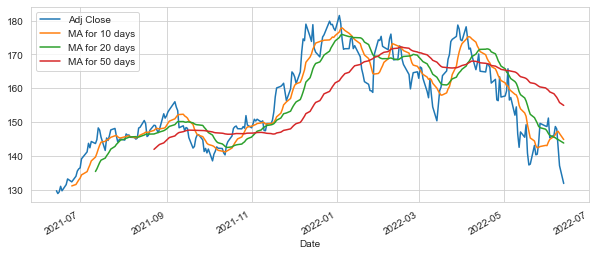

In [9]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(
    subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

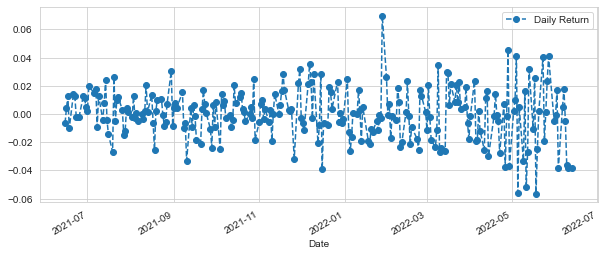

In [11]:
#Retrieve daily returns for Apple stock
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()#daily ret is % change in adj close
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\Pragati Katiyar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

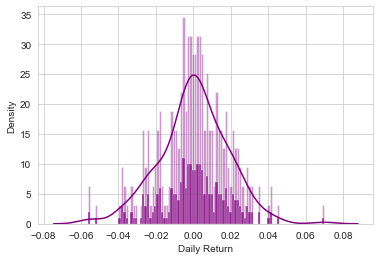

In [24]:
#Average daily return for past year
#distplot allows to place two plots on top of each other
sns.distplot(AAPL['Daily Return'].dropna(),color='purple',bins=100)
#Better use displot since distplot is deprecated

#Using histplot for same graph
sns.histplot(AAPL['Daily Return'].dropna(),color='purple',bins=100)


Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [6]:
#Analyse the returns of all stocks in list
#Get the adj close column of all stocks in techl and put them in a single dataframe
closingdf=pdweb.get_data_yahoo(techl,start,end)['Adj Close']
closingdf.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-15,128.903534,2520.659912,256.267456,169.156494
2021-06-16,129.410645,2513.929932,255.295364,170.762497
2021-06-17,131.041321,2527.419922,258.786835,174.462006
2021-06-18,129.718887,2511.350098,257.328796,174.345001
2021-06-21,131.548431,2529.100098,260.502838,172.697998


In [7]:
#Make new dataframe rets for returns
techrets=closingdf.pct_change()
techrets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,0.003934,-0.002670,-0.003793,0.009494
2021-06-17,0.012601,0.005366,0.013676,0.021665
2021-06-18,-0.010092,-0.006358,-0.005634,-0.000671
2021-06-21,0.014104,0.007068,0.012335,-0.009447


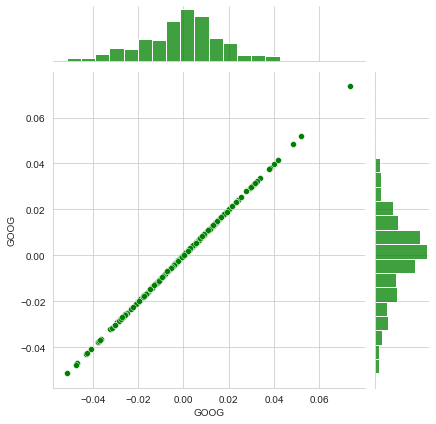

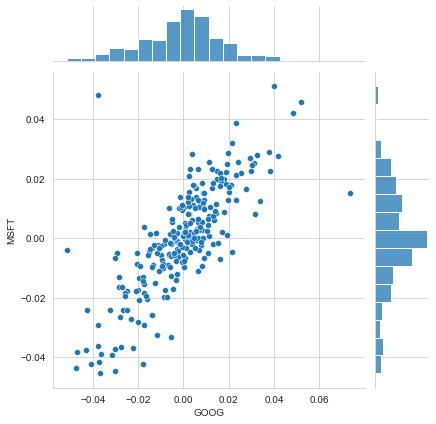

In [33]:
#Now we can compare the daily percentage return of two stocks to check how 
#correlated. First let's see a sotck compared to itself.
#Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG',y='GOOG',data=techrets,kind='scatter',color='green')

#Compare two different stocks
sns.jointplot(x='GOOG',y='MSFT',data=techrets,kind='scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are.

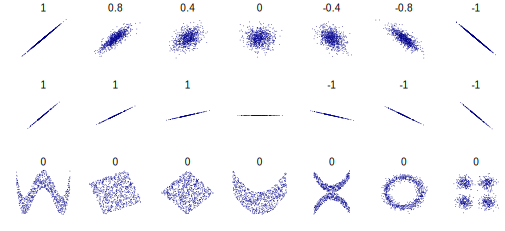

In [1]:
#Different pair plots
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')




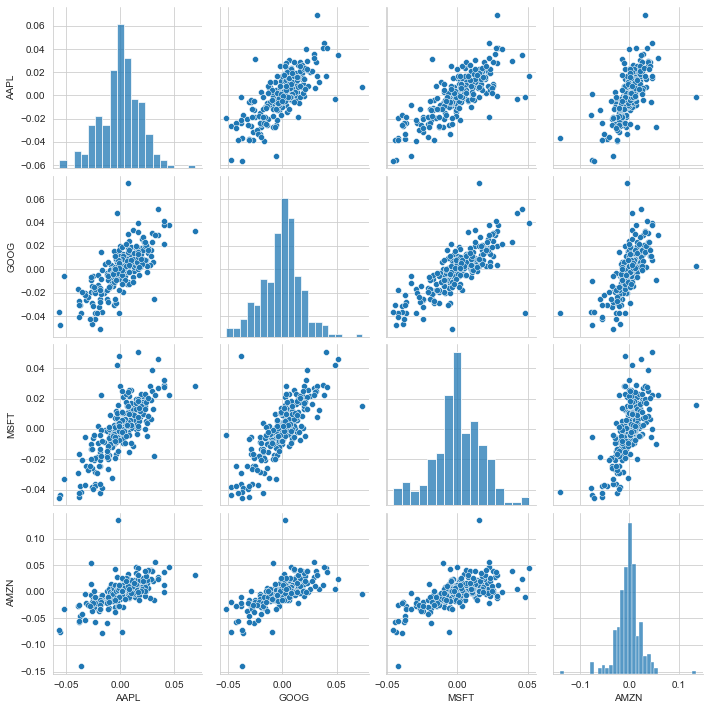

In [10]:
#Correlation/comparison plots of all possible combinations of stocks
sns.pairplot(techrets.dropna())

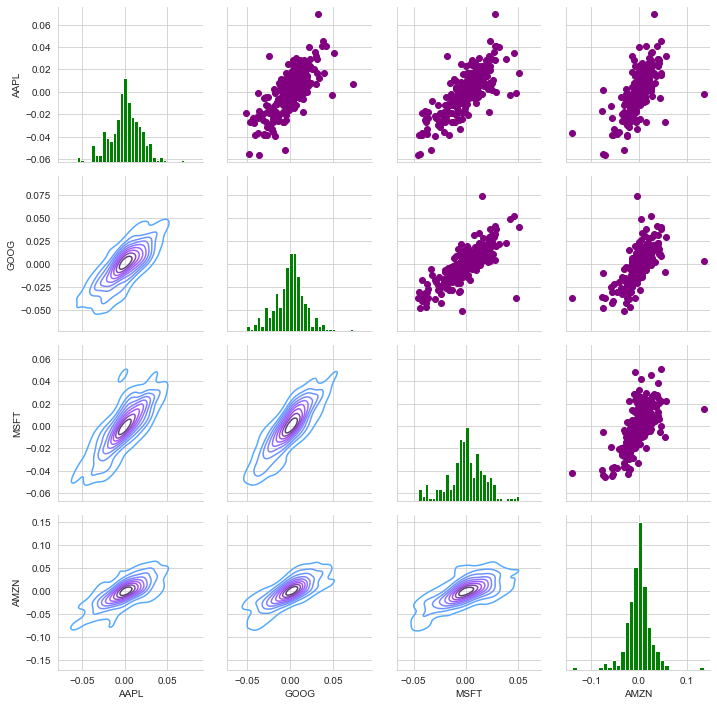

In [12]:
returnsfig=sns.PairGrid(techrets.dropna())
returnsfig.map_upper(plt.scatter,color='purple')#putting the scatter maps in the
#upper triangle
# Using map_upper we can specify what the upper triangle will look like.

returnsfig.map_lower(sns.kdeplot,cmap='cool_d')#putting the kde plots in the
#lower triangle

returnsfig.map_diag(plt.hist,bins=30,color='green')#putting the histograms in 
#the diagonal


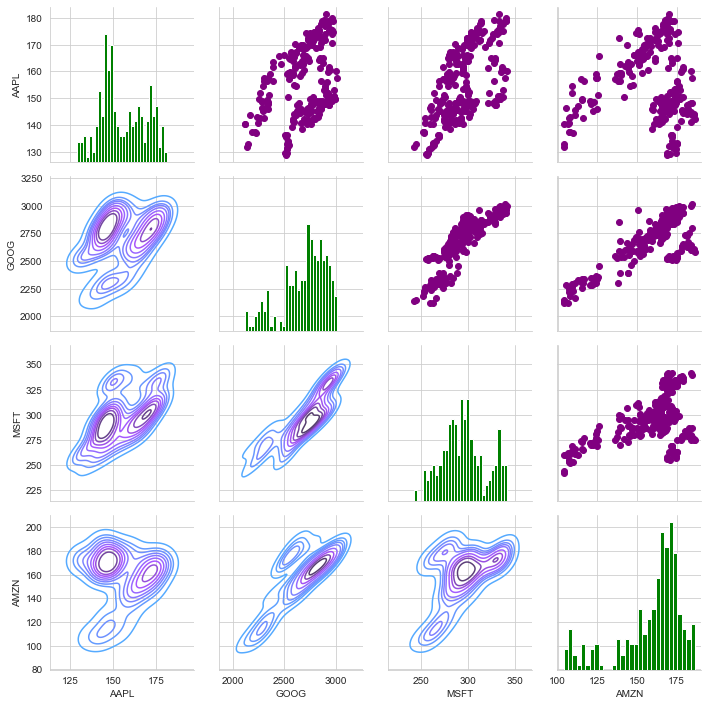

In [13]:
#Correaltion of closing prices
closefig=sns.PairGrid(closingdf)
closefig.map_upper(plt.scatter,color='purple')

closefig.map_lower(sns.kdeplot,cmap='cool_d')

closefig.map_diag(plt.hist,bins=30,color='green')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

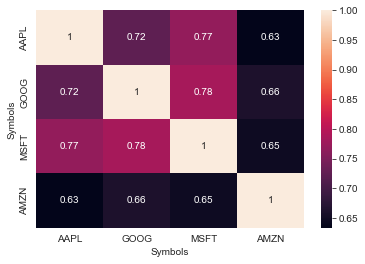

In [19]:
#If we want to see the actual value of correlation plots then
sns.heatmap(techrets.dropna().corr(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

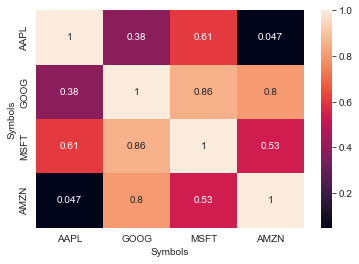

In [22]:
#Same thing for closing prices 
sns.heatmap(closingdf.corr(),annot=True)

RISKS OF A STOCK
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

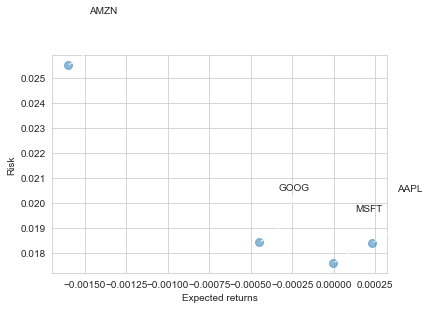

In [8]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets=techrets.dropna()
area=np.pi*20 #to enlarge the value of points so that they are visible in the plot

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


#VALUE AT RISK
 We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk.

In [9]:
#Use quantile to get the risk value of the stock
rets['AAPL'].quantile(0.05) # 

-0.032172004947727526

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

In [21]:
#Using Monte Carlo method for risk analysis
# Set up our time horizon
days=365

# Now our delta
dt=1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu=rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma=rets.std()['GOOG']



Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [22]:
def stockmc(startprice,days,mu,sigma):
    price=np.zeros(days)
    price[0]=startprice
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [13]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-15,2537.239990,2512.969971,2530.439941,2520.659912,1109100,2520.659912
2021-06-16,2530.469971,2482.999023,2524.949951,2513.929932,1315800,2513.929932
2021-06-17,2543.929932,2510.300049,2510.459961,2527.419922,1287800,2527.419922
2021-06-18,2527.780029,2492.060059,2514.110107,2511.350098,2665300,2511.350098
2021-06-21,2540.735107,2502.685059,2514.800049,2529.100098,1312800,2529.100098


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

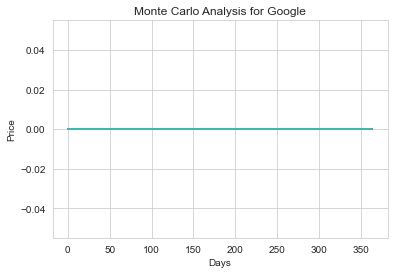

In [23]:
# Get start price from GOOG.head() which is open value for first row in GOOG.head()
startprice=2530.439941

#Run the monte carlo simulation 100 time
for run in range(100):
    plt.plot(stockmc(startprice,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')



In [24]:
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stockmc(startprice,days,mu,sigma)[days-1]

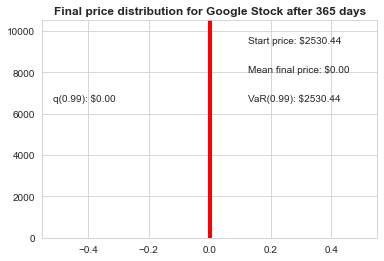

In [27]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %startprice)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (startprice - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');